# Module 5 homework

**This homework has 6 questions.**

# Import libraries

In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.preprocessing import StandardScaler
import warnings

from utils import (
    plot_dendrogram,
    tune_agglomerative_clustering,
    tune_k_means
)

In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In this homework, we take another look at the mall shoppers dataset that we used for clustering.

# Read data and basic preparation

Here we read the data.

In [3]:
mall_customers = pd.read_csv('data/mall_customers.csv')
mall_customers.drop(['CustomerID', 'Gender'], axis=1, inplace=True)

In [4]:
mall_customers.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


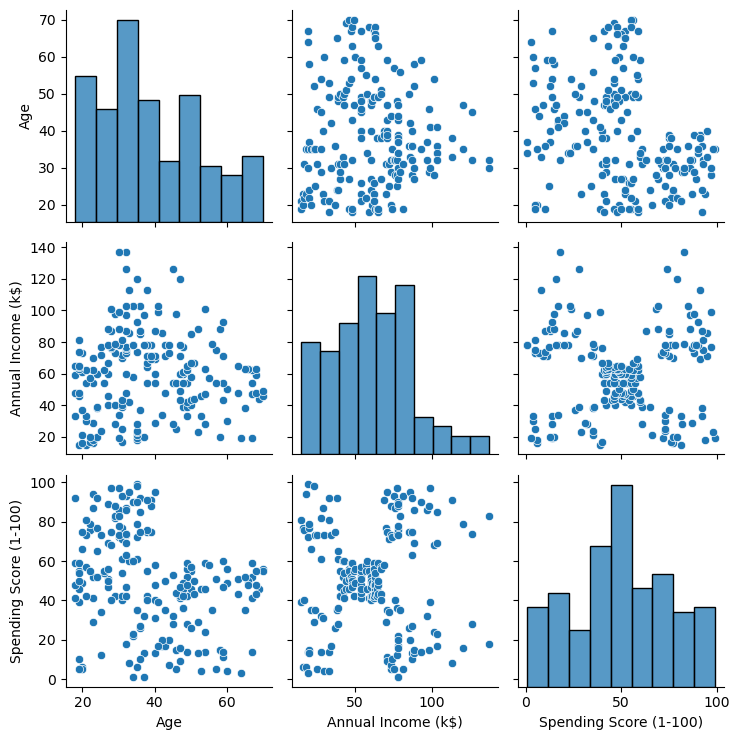

In [5]:
_ = sns.pairplot(mall_customers)
plt.tight_layout()

# k-means

We will use the [Calinski-Harabasz score](https://scikit-learn.org/stable/modules/clustering.html#calinski-harabasz-index_) as a heuristic to try and determine the best value for `k`.

  File "C:\Users\yashayi\AppData\Local\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(


Optimal k: 6


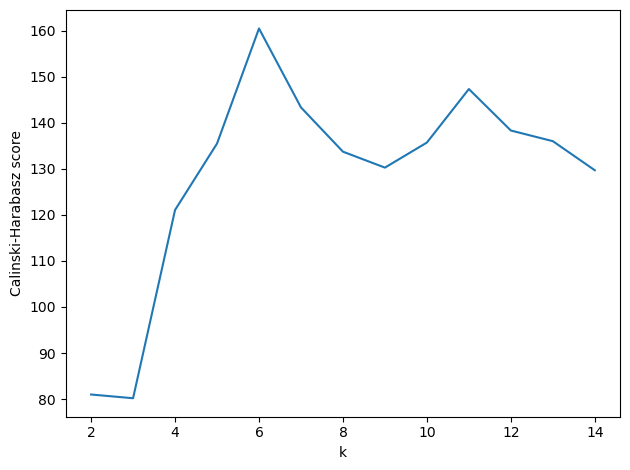

In [6]:
k_means_tuning = tune_k_means(data=mall_customers, k=range(2, 15), n_init = 10)

ax = plt.gca()
ax.set_xlabel('k')
ax.set_ylabel('Calinski-Harabasz score')
plt.tight_layout()

print(f"Optimal k: {k_means_tuning.get('best_k')}")

## Question 1 (2 points)
How sensitive is k-means on these data to the choice of the score function (e.g. Calinski-Harabasz score vs. other similar metrics)?

Repeat the step above using the (negative of the) [Davies-Bouldin score](https://scikit-learn.org/stable/modules/clustering.html#davies-bouldin-index)

```
k_means_tuning = tune_k_means(
    data=mall_customers, k=range(2, 15), score_function=davies_bouldin_score
)
```

and the [Silhouette score](https://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient)

```
k_means_tuning = tune_k_means(
    data=mall_customers, k=range(2, 15), score_function=silhouette_score
)
```

Is k-means sensitive to the choice of the score function on these data? Explain.

## Answer 1

In [ ]:
Cluster 0: old, medium income, medium spending
Cluster 1: young, medium income, medium spending
Cluster 2: young, high income, high spending
Cluster 3: all age, high income, low spending
Cluster 4: young, high income, high spending
Cluster 5: old, low income, low spending

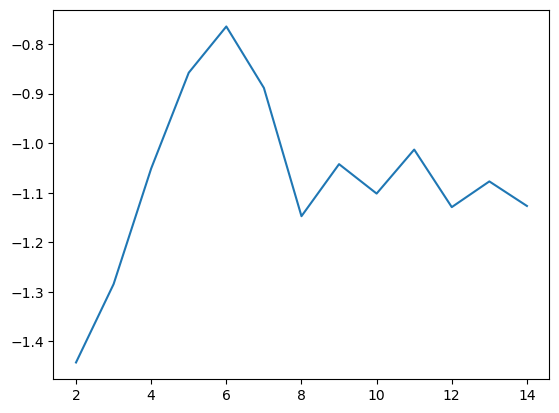

In [39]:
k_means_tuning = tune_k_means(
    data=mall_customers, k=range(2, 15), score_function=davies_bouldin_score
)

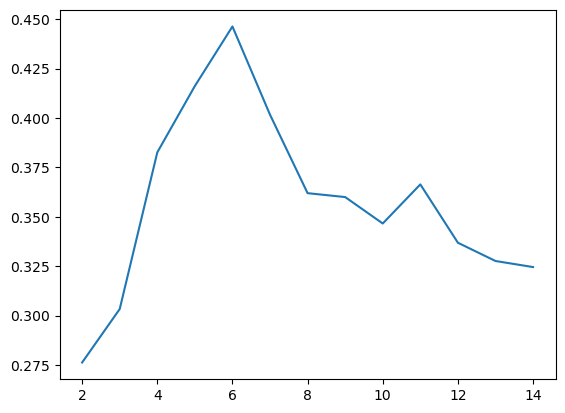

In [8]:
k_means_tuning = tune_k_means(
    data=mall_customers, k=range(2, 15), score_function=silhouette_score
)

In [ ]:
k_means_tuning = tune_k_means(
    data=mall_customers, k=range(2, 15), score_function=davies_bouldin_score
)

Your answer here.
It is sensitive to the choice of the score function on these data? 
No, it's not sensitive. The K value are the same, they are all 6.

# Hierarchical clustering

Optimal number of clusters: 6


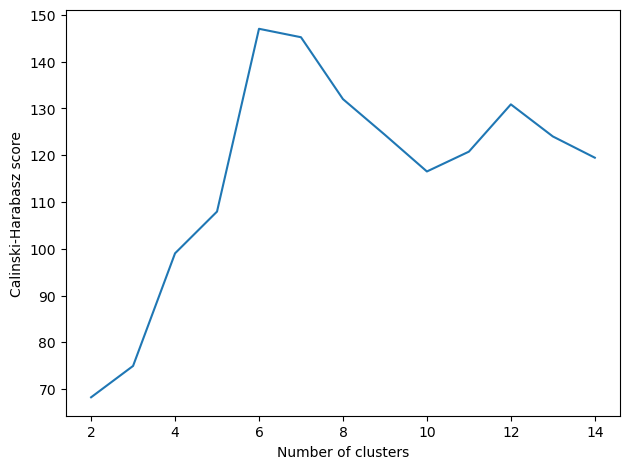

In [14]:
agglomerative_clustering_tuning = tune_agglomerative_clustering(data=mall_customers, k=range(2, 15))

ax = plt.gca()
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Calinski-Harabasz score')
plt.tight_layout()

print(f"Optimal number of clusters: {agglomerative_clustering_tuning.get('best_k')}")

## Question 2 (1 points)
Repeat the same experiment for hierarchical clustering.

Is hierarchical clustering sensitive to the choice of the score function on these data? Explain.

## Answer 2

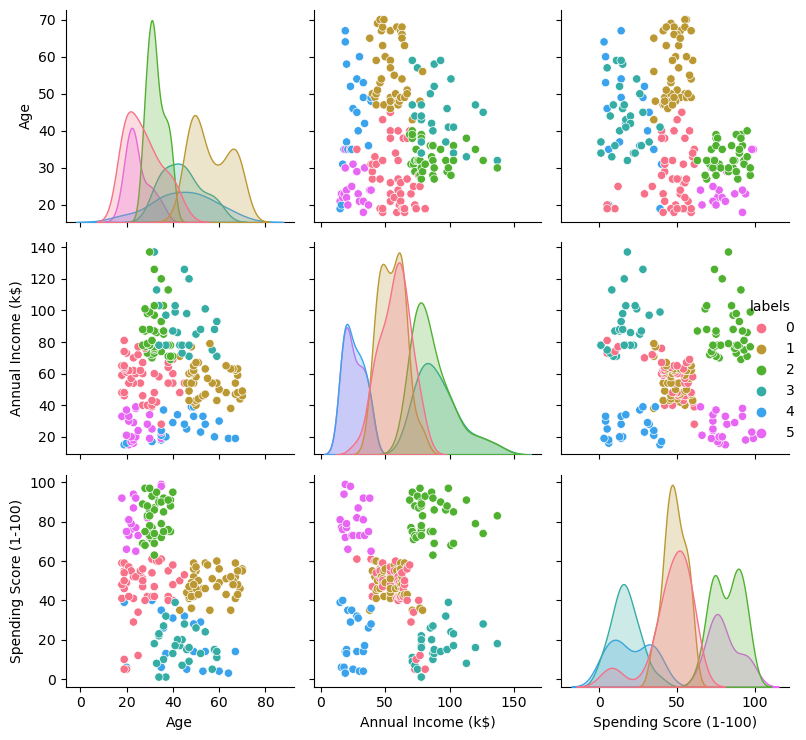

In [16]:
agglomerative_clustering_plot_data = mall_customers.copy()
agglomerative_clustering_plot_data['labels'] = agglomerative_clustering_tuning.get('best_model').labels_
_ = sns.pairplot(
    agglomerative_clustering_plot_data,
    hue='labels',
    palette=sns.color_palette('husl', agglomerative_clustering_tuning.get('best_k'))
)

plt.tight_layout()
plt.savefig(os.path.join('img', 'clustering-hierarchical_pairplot.png'), dpi=300)

Optimal number of clusters: 6


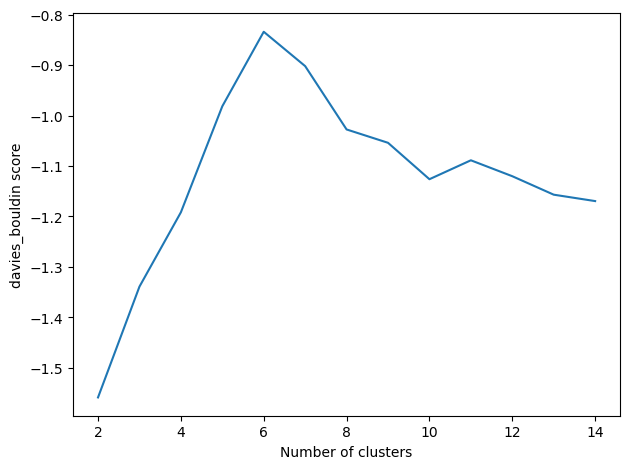

In [11]:
agglomerative_clustering_tuning2 = tune_agglomerative_clustering(data=mall_customers, k=range(2, 15), score_function=davies_bouldin_score)

ax = plt.gca()
ax.set_xlabel('Number of clusters')
ax.set_ylabel('davies_bouldin score')
plt.tight_layout()

print(f"Optimal number of clusters: {agglomerative_clustering_tuning2.get('best_k')}")

Optimal number of clusters: 6


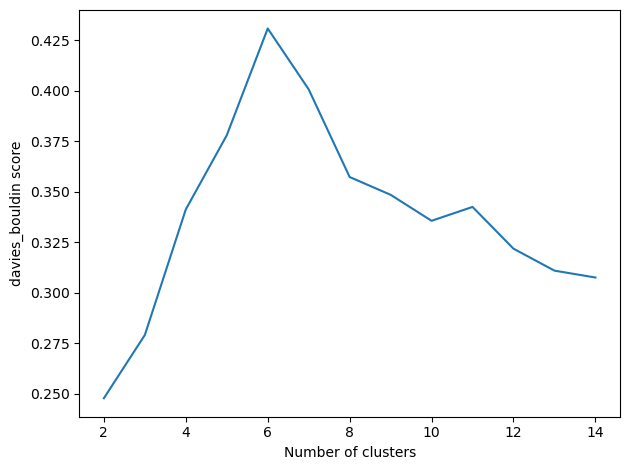

In [12]:
agglomerative_clustering_tuning3 = tune_agglomerative_clustering(data=mall_customers, k=range(2, 15), score_function=silhouette_score)

ax = plt.gca()
ax.set_xlabel('Number of clusters')
ax.set_ylabel('davies_bouldin score')
plt.tight_layout()

print(f"Optimal number of clusters: {agglomerative_clustering_tuning3.get('best_k')}")

Your answer here.
It is sensitive to the choice of the score function on these data? 
No. The K value are the same, they are all 6.

## Question 3 (2 points)
Based on what you learned in this module and in this homework, describe two key tactics that you can use to gain additional confidence that any hidden structure or patterns found using a particular clustering 
algorithm is in fact a true characteristic of the data?

Comment.

## Answer 3

Your answer here.
To gain additional confidence in the patterns found by a clustering algorithm, we can do 

1. Cross-validation with multiple clustering algorithms: Apply different clustering methods to the data. If we find similiar patterns or structures from different models, we can confirm the pattern exists in data, not the artifact of a specific algorithm.

2. Stability testing: Evaluate the stability of the clustering solution across different subsamples of the data. When we try the cluster solution in different subsets, and it remains consistent, we can determine that the cluster reflects true characteristics of the data.

3. Use dimensionality reduction techniques like PCA to visualize the data in lower dimensions, this will help with assessing cluster separability and the existence of patterns. These approaches can help validate that identified structures genuinely reflect characteristics of the data.

## Question 4 (3 points)
Fit a PCA model to the mall customers data.

## Answer 4

In [22]:
pca_model = PCA()
pca_fit = pca_model.fit_transform(
    StandardScaler().fit_transform(mall_customers)
)

## Question 5 (1 point)
What is the maximum number of principal components that can be found in these data? Explain.

## Answer 5

In [38]:
np.round(np.cumsum(pca_model.explained_variance_ratio_)[1], 2)

0.776

In [ ]:
This is confirmed by the following plot which depicts how much of the original information/variability in the data is captured by progressively larger linear subspaces found via PCA.

The plot is telling us that the data is mostly concentrated in a 2-dimensional subspace. The additional dimensions are mostly populated by noise.

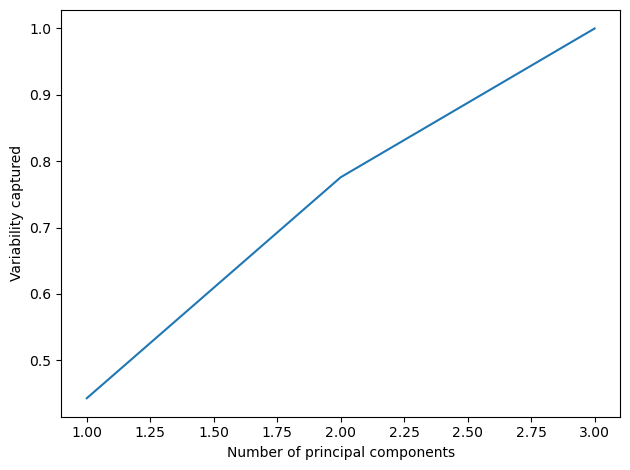

In [34]:
_ = plt.plot(range(1, mall_customers.shape[1] + 1), np.cumsum(pca_model.explained_variance_ratio_))
ax = plt.gca()
_ = ax.set_xlabel("Number of principal components")
_ = ax.set_ylabel("Variability captured")

plt.tight_layout()
plt.savefig(os.path.join("img", "pca-scree_plot_cities.png"), dpi=300)

Your answer here.
the maximum number of principal components that can be found in these data is 3.
Because we will lose 20% of variability if we choose 2.
Variance explained by 2 components: 77.57%
Variance explained by 3 components: 100.0%

Here, we plot the cumulative fraction of variability explained by an increasing number of principal components.

Variance explained by 1 components: 44.27%
Variance explained by 2 components: 77.57%
Variance explained by 3 components: 100.0%


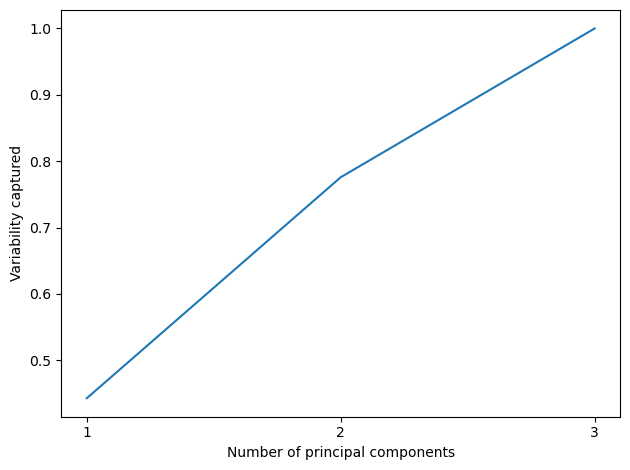

In [37]:
try:
    cumulative_variance_explained = np.cumsum(pca_model.explained_variance_ratio_)

    _ = plt.plot(range(1, mall_customers.shape[1] + 1), cumulative_variance_explained)
    ax = plt.gca()
    _ = ax.set_xlabel("Number of principal components")
    _ = ax.set_ylabel("Variability captured")
    _ = ax.set_xticks([1, 2, 3])
    plt.tight_layout()

    for index, item in enumerate(cumulative_variance_explained):
        print(f"Variance explained by {index + 1} components: {round(item * 100, 2)}%")
except NameError:
    print('The object `pca_model` does not exist! Did you forget to create it?')

## Question 6 (1 points)

What do you think is the effective dimensionality of the dataset based on the plot above? Is PCA recommended in this case?

Explain.

## Answer 6

Your answer here.

Clustering is the canonical example, and there are many clustering methods
• K-means
• Hierarchical
• Density-based
• In PCA, we try to see if a lower dimensional representation of the data suffices

We should choose 3 as the effective dimensionality of the dataset 

In [45]:
# Calculate the correlation matrix
correlation_matrix = mall_customers.corr()

print(correlation_matrix)

                             Age  Annual Income (k$)  Spending Score (1-100)
Age                     1.000000           -0.012398               -0.327227
Annual Income (k$)     -0.012398            1.000000                0.009903
Spending Score (1-100) -0.327227            0.009903                1.000000


Because the correlation numbers are small, each of them is a factor to the model seperatively. We have to use all 3 of them in the model